# "Poverty Measurement Analysis in Peru (2022): A Multidimensional Approach"

# Introducción


📌 Este proyecto titulado "Poverty Measurement Analysis in Peru (2022): A Multidimensional Approach" tiene como objetivo analizar la pobreza en Perú durante el año 2022, utilizando un enfoque basado en los ingresos y el empleo. El análisis se centrará en identificar los principales factores que afectan los niveles de pobreza, tales como la formalidad laboral, las ocupaciones principales, y las diferencias geográficas entre zonas urbanas y rurales.

📌 Usaremos herramientas como Python para manipular datos, Matplotlib y Seaborn para visualizaciones, Scikit-learn para modelos predictivos, y GeoPandas para análisis geoespacial. Este análisis permitirá comprender mejor las dinámicas de la pobreza en Perú y ofrecerá insights útiles para la toma de decisiones en políticas públicas.

In [149]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

📌 Puedes descargar la data procesada aquí: 👇👇

✅ https://github.com/WLozanoH/Poverty-Peru/blob/main/data2022-500-limpia.csv

In [150]:
#cargamos la data
df = pd.read_csv('data2022-500-limpia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79720 entries, 0 to 79719
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mes                         79720 non-null  object 
 1   ubigeo                      79720 non-null  int64  
 2   dominio                     79720 non-null  object 
 3   estrato                     79720 non-null  object 
 4   empleo_fijo                 79720 non-null  object 
 5   negocio_propio              79720 non-null  object 
 6   ocupacion_principal         79720 non-null  object 
 7   trabajo_ocup_principal      79720 non-null  object 
 8   registro_sunat              79720 non-null  object 
 9   sueldo_ingresos             79720 non-null  object 
 10  honorarios_ingresos         79720 non-null  object 
 11  no_recibe_ingresos          79720 non-null  object 
 12  tipo_contrato               79720 non-null  object 
 13  ingreso_total               797

# Análisis de Pobreza por:

# 1. Análisis de Ingresos

* Variables clave: 'sueldo_ingresos', 'honorarios_ingresos', 'no_recibe_ingresos', 'ingreso_total', 'fact_expan_ingresos_empleo', 'zonas'

* Objetivo: Comparar los ingresos de los hogares con las líneas de pobreza establecidas por el INEI para 2022.

        Acción: Comparar el ingreso_total de cada hogar con la línea de pobreza y pobreza extrema (que varían por zonas urbanas y rurales) para determinar cuántos hogares están por debajo de la línea de pobreza.

👉 Según INEI(Instituto nacional de estadística e informática):

📌 Línea de pobreza (2022):

        Nacional: S/ 415 per cápita mensual.
        Urbano: S/ 452 per cápita mensual.
        Rural: S/ 333 per cápita mensual.

📌 Línea de pobreza extrema (2022):

        Nacional: S/ 223 per cápita mensual.
        Urbano: S/ 236 per cápita mensual.
        Rural: S/ 196 per cápita mensual.

In [151]:
df.head(2)

,mes,ubigeo,dominio,estrato,empleo_fijo,negocio_propio,ocupacion_principal,trabajo_ocup_principal,registro_sunat,sueldo_ingresos,honorarios_ingresos,no_recibe_ingresos,tipo_contrato,ingreso_total,ocupinf,fact_expan_ingresos_empleo,zonas
0,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,empleado,administración Pública,missing value,si recibe,otro,otro,indefinido,5000.0,empleo informal,48.341564,urbano
1,Febrero,10101,Sierra Norte,"20,000 a 49,999",missing value,missing value,obrero,empresa privada,persona natural,otro,otro,otro,otro,800.0,empleo formal,46.851582,urbano


* Trabajamos en el dataframe 'df'

Según los ingresos:
Recuento de Pobreza total:
estado_pobreza
No pobre           53468
Pobreza            21298
Pobreza extrema     4954
Name: count, dtype: int64
----------------------------
Porcentaje de Pobreza total:
estado_pobreza
No pobre           67.069744
Pobreza            26.716006
Pobreza extrema     6.214250
Name: count, dtype: float64


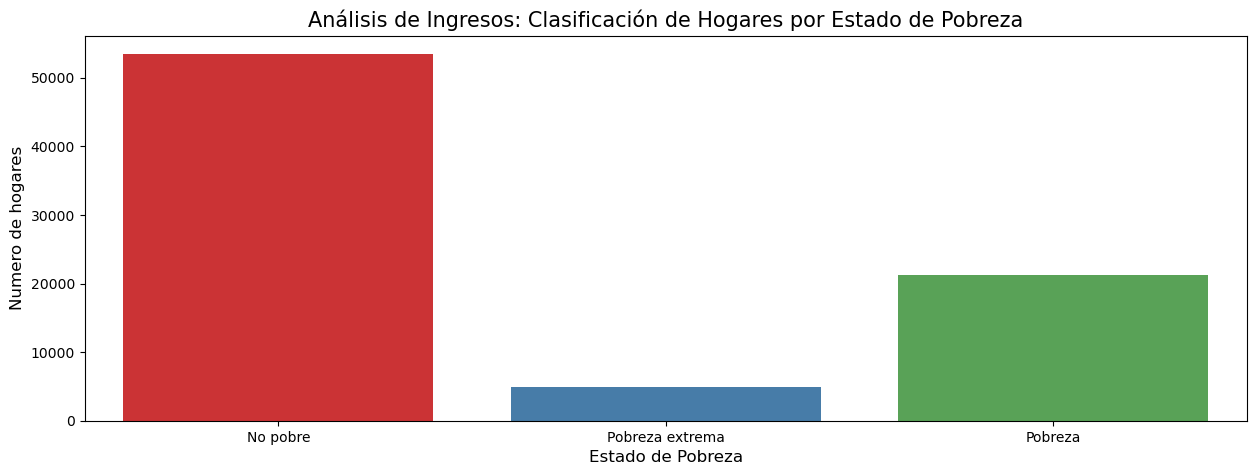

In [152]:
# paso 1: Definir la línea de pobreza
lineas_pobreza = {
    
    'urbano': {'pobreza': 452, 'pobreza extrema': 236},
    'rural': {'pobreza': 333, 'pobreza extrema': 196}
}

#Paso 2: crear una función para clasificar a los hogares 
def clasificar_hogares(row):
    if row['zonas'] == 'urbano':
        linea_pobreza = lineas_pobreza['urbano']['pobreza']
        linea_pobreza_extrema = lineas_pobreza['urbano']['pobreza extrema']
    else:
        linea_pobreza = lineas_pobreza['rural']['pobreza']
        linea_pobreza_extrema = lineas_pobreza['rural']['pobreza extrema']

    if row['ingreso_total'] < linea_pobreza_extrema:
        return 'Pobreza extrema'
    
    elif row['ingreso_total'] < linea_pobreza:
        return 'Pobreza'
    else:
        return 'No pobre'


#Paso 3: Aplicar la función:
df['estado_pobreza'] = df.apply(clasificar_hogares, axis=1)

#Paso 5: Imprimir resumen de la cantidad total de pobreza y porcentaje
pobreza_conteo = df['estado_pobreza'].value_counts()
pobreza_porcentaje = df['estado_pobreza'].value_counts() /df['estado_pobreza'].shape[0] *100

print("Según los ingresos:")
print(f"Recuento de Pobreza total:\n{pobreza_conteo}")
print('----------------------------')
print(f"Porcentaje de Pobreza total:\n{pobreza_porcentaje}")

#paso 6: graficar resultados
plt.figure(figsize=(15,5))
sns.countplot(x='estado_pobreza', data=df, palette='Set1')
plt.title("Análisis de Ingresos: Clasificación de Hogares por Estado de Pobreza", fontsize = 15)
plt.xlabel('Estado de Pobreza', fontsize = 12)
plt.ylabel('Numero de hogares', fontsize = 12)

#mostrar la gráfica
plt.show()

📌 *Conclusiones sobre Análisis de pobreza según ingresos:*

1. *Mayoría no pobre:* El 67.07% de los hogares tiene ingresos por encima de la línea de pobreza.
2. *Alta incidencia de pobreza:* El 26.72% de los hogares vive por debajo de la línea de pobreza, mostrando una vulnerabilidad considerable.
3. *Pobreza extrema significativa:* El 6.21% de los hogares se encuentra en pobreza extrema, lo que refleja una situación crítica para este grupo.

* *Insight Clave*

        El 32.93% de los hogares vive en condiciones de pobreza o pobreza extrema, subrayando la 
        necesidad urgente de políticas focalizadas para mejorar la situación de estos grupos vulnerables.


In [153]:
#crear una variable que agrupe las personas que reciben ingresos vs las que no y las que estan en zona de pobreza

# 2. Análisis de Empleo y Calidad del Trabajo

* Variables clave: 'empleo_fijo', 'negocio_propio', 'ocupacion_principal', 'trabajo_ocup_principal', 'tipo_contrato', 'registro_sunat'.
* Objetivo: Determinar la relación entre el tipo de empleo y la pobreza.

        Acción: Agrupa a las personas por tipo de empleo (empleo_fijo, negocio_propio) y relación laboral (tipo_contrato, registro_sunat). Compara sus ingresos medios y su incidencia de pobreza.

Paso 1: Crear categorías de empleo y tipo de relación laboral

In [154]:
# Paso 1: Crear categorías de empleo y tipo de relación laboral

#agrupar a las personas por 'tipo de empleo' (empleo_fijo, negocio_propio)
#crear una columna de 'tipo_empleo'
df['tipo_empleo'] = np.where(df['empleo_fijo'] == 'tiene', 'empleo_fijo',
                                     np.where(df['negocio_propio'] ==  'tiene', 'negocio_propio', 'otro'))

# Crear una columna de 'tipo_relacion_laboral'
df['tipo_relacion_laboral'] = np.where(df['registro_sunat'] == 'persona jurídica', 'formal',
                                               np.where(df['registro_sunat'] == 'persona natural', 'formal', 'informal'))

In [155]:
#chekeamos los valores
print('Conteo:',df['tipo_empleo'].value_counts())
print('----------------')
print('Porcentaje:',(df['tipo_empleo'].value_counts()/df.shape[0])*100)
print('----------------')
print('----------------')
print('Conteo:',df['tipo_relacion_laboral'].value_counts())
print('----------------')
print('Porcentaje:',(df['tipo_relacion_laboral'].value_counts()/df.shape[0])*100)

Conteo: tipo_empleo
otro              78638
empleo_fijo         699
negocio_propio      383
Name: count, dtype: int64
----------------
Porcentaje: tipo_empleo
otro              98.642750
empleo_fijo        0.876819
negocio_propio     0.480432
Name: count, dtype: float64
----------------
----------------
Conteo: tipo_relacion_laboral
informal    64858
formal      14862
Name: count, dtype: int64
----------------
Porcentaje: tipo_relacion_laboral
informal    81.35725
formal      18.64275
Name: count, dtype: float64


Paso 2: Calcular ingresos promedio por tipo de empleo y relación laboral

    Calcular los ingresos medios según el tipo de empleo y relación laboral.
    calcular la incidencia de pobreza comparando los ingresos con una línea de pobreza establecida.
    
    Según INEI:
    📌 Línea de pobreza (2022):

        Nacional: S/ 415 per cápita mensual.

In [156]:
#Paso 3: Calcular ingresos promedio por tipo de empleo y relación laboral

# Definir una línea de pobreza
linea_pobreza = 415

# Crear una columna binaria para identificar si están por debajo de la línea de pobreza
df['es_pobre'] = df['ingreso_total'] < linea_pobreza

#agrupar por 'tipo_empleo' y 'tipo_relacion_laboral', calcular los ingresos medios y la tasa de pobreza
resumen_empleo = df.groupby(['tipo_empleo','tipo_relacion_laboral']).agg(
    ingresos_promedio = ('ingreso_total','mean'),
    tasa_pobreza = ('es_pobre','mean')
    
).reset_index()

print(f"Análisis de la pobreza según el tipo de empleo y tipo de relación laboral:\n\n{resumen_empleo}")


Análisis de la pobreza según el tipo de empleo y tipo de relación laboral:

      tipo_empleo tipo_relacion_laboral  ingresos_promedio  tasa_pobreza
0     empleo_fijo                formal        1964.941558      0.051948
1     empleo_fijo              informal        2498.721228      0.023018
2  negocio_propio                formal         975.000000      0.035714
3  negocio_propio              informal         631.267606      0.526761
4            otro                formal        1225.044059      0.187732
5            otro              informal         845.043252      0.361695


Paso 3: Visualización de resultados

Usamos gráficos para visualizar la relación entre el tipo de empleo, los ingresos medios y la incidencia de pobreza.

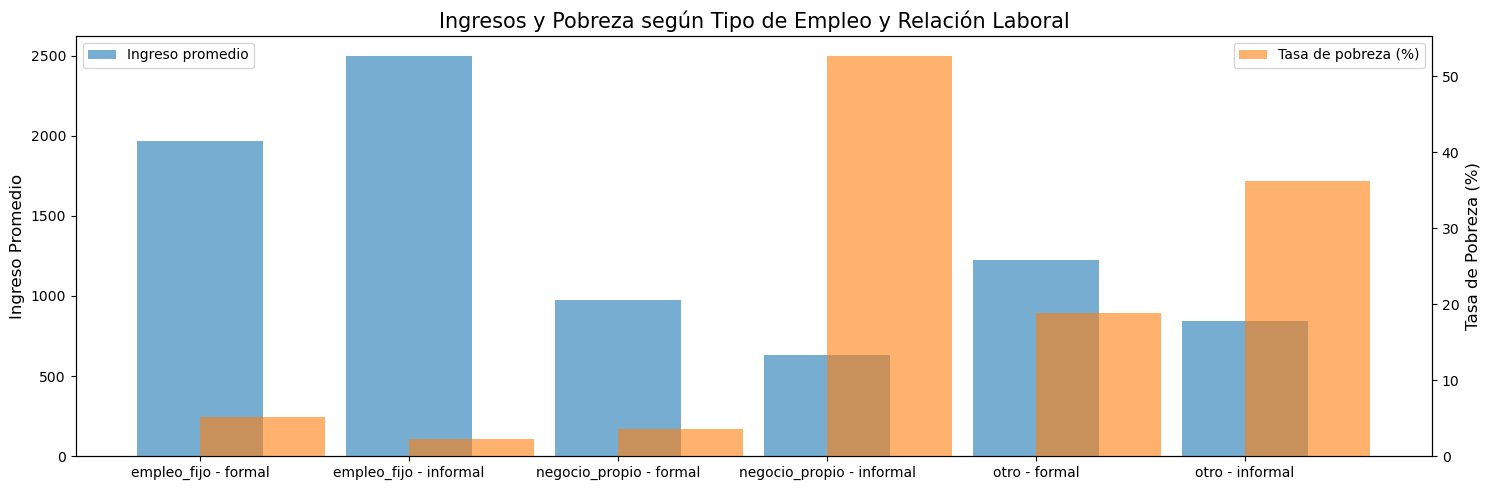

In [157]:
# Crear una nueva columna para identificar claramente cada categoría
resumen_empleo['categoria'] = resumen_empleo['tipo_empleo'] + ' - ' + resumen_empleo['tipo_relacion_laboral']

#paso 4: Visualización de resultados
# Crear un gráfico de barras para los ingresos promedio y la tasa de pobreza
fig, ax1 = plt.subplots(figsize=(15, 5))

# Gráfico de ingresos promedio
bars1 = ax1.bar(resumen_empleo['categoria'], resumen_empleo['ingresos_promedio'], color='#1f77b4', label='Ingreso promedio', alpha=0.6, width=0.6)

# Crear otro eje para la tasa de pobreza
ax2 = ax1.twinx()
bars2 = ax2.bar(resumen_empleo['categoria'], resumen_empleo['tasa_pobreza'] * 100, color='#ff7f0e', label='Tasa de pobreza (%)', alpha=0.6, align='edge',width=0.6)

#Título y etiquetas
plt.title('Ingresos y Pobreza según Tipo de Empleo y Relación Laboral', fontsize = 15)
ax1.set_ylabel('Ingreso Promedio', fontsize = 12)
ax2.set_ylabel('Tasa de Pobreza (%)', fontsize = 12)

# Mover la leyenda a una ubicación que no se superponga
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

#ajustar diseño de grafico y mostrar
plt.tight_layout()
plt.show()

📌 Conclusiones:

1. Las personas con empleo fijo y formal ganan en promedio S/ 1,964.94, con solo un 5.2% en pobreza. Curiosamente, el empleo fijo informal tiene un ingreso promedio mayor (S/ 2,498.72) y una menor tasa de pobreza (2.3%).

2. Quienes tienen negocio propio informal son los más vulnerables, con un ingreso promedio de S/ 631.27 y más de la mitad (52.7%) en pobreza.

3. Otros empleos en el sector informal también muestran altos niveles de pobreza (36.2%).

* *Insight Clave*

        El 52.7% de los trabajadores con negocio propio informal están en pobreza, 
        en comparación con solo el 5.2% de quienes tienen empleo fijo formal.

In [158]:
# Paso 4: Eliminamos variables analizadas para aligerar la memoria
df.drop(columns = ['empleo_fijo','negocio_propio','registro_sunat'], inplace= True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79720 entries, 0 to 79719
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mes                         79720 non-null  object 
 1   ubigeo                      79720 non-null  int64  
 2   dominio                     79720 non-null  object 
 3   estrato                     79720 non-null  object 
 4   ocupacion_principal         79720 non-null  object 
 5   trabajo_ocup_principal      79720 non-null  object 
 6   sueldo_ingresos             79720 non-null  object 
 7   honorarios_ingresos         79720 non-null  object 
 8   no_recibe_ingresos          79720 non-null  object 
 9   tipo_contrato               79720 non-null  object 
 10  ingreso_total               79720 non-null  float64
 11  ocupinf                     79720 non-null  object 
 12  fact_expan_ingresos_empleo  79720 non-null  float64
 13  zonas                       797

# 3. Análisis por Zonas y Estratos Socioeconómicos

* Variables clave: zonas, estrato, dominio, ubigeo.
* Objetivos: Evaluar la pobreza de acuerdo con la ubicación geográfica y estrato socioeconómico.

📌 Pobreza por regiones: Usar la variable ubigeo para hacer un análisis geoespacial y 
determinar qué regiones presentan mayores niveles de pobreza en términos de ingresos o empleo informal.

📌 Estratificación socioeconómica: Analizar si los estratos (estrato) más bajos tienen una mayor proporción 
de personas bajo la línea de pobreza, comparándolos con los estratos más altos.

📌Expansión de ingresos: Usar fact_expan_ingresos_empleo para ajustar las estimaciones, permitiendo 
que tu análisis refleje mejor las diferencias poblacionales entre zonas o estratos.

* Paso 1: Segmentación por zonas y estrato

In [160]:
#conteo por zona
conteo_zonas = df['zonas'].value_counts()

#conteo por estrato
conteo_estrato = df['estrato'].value_counts()

#Mostrar resultados
print('conteo:',conteo_zonas)
print('-------------')
print('conteo:',conteo_estrato)



conteo: zonas
urbano    58320
rural     21400
Name: count, dtype: int64
-------------
conteo: estrato
100,000 a 499,999    15876
AER Compuesto        15567
500,000 a más        15059
2,000 a 19,999       10466
50,000 a 99,999       6934
AER Simple            5833
20,000 a 49,999       5773
500 a 1,999           4212
Name: count, dtype: int64


* Paso 2: Cálculo de la Proporción de Hogares Bajo la Línea de Pobreza

   👉 Usamos la columna creada anteriormente 'es_pobre' de tipo booleano( 1:pobre, 0:no pobre), para filtrar hogares por debajo de la línea de pobreza


In [161]:
#filtramos hogares por debajo de la línea de pobreza
hogares_pobreza = df[df['es_pobre'] == 1]

#proporción de hogares en pobreza por zona
proporcion_pobreza_zonas = hogares_pobreza.groupby('zonas').size() / df.groupby('zonas').size() * 100
proporcion_pobreza_zonas = round(proporcion_pobreza_zonas,2)

#proporcion de hogares en pobreza por estrato
proporcion_pobreza_estrato = hogares_pobreza.groupby('estrato').size() / df.groupby('estrato').size() * 100
proporcion_pobreza_estrato = round(proporcion_pobreza_estrato,2)

# Mostrar resultados
print(f"Porcentaje Pobreza:\n👉{proporcion_pobreza_zonas}")
print('-----------------')
print(f"AER = Área de Empadronamiento Rural")
print(f"Porcentaje Pobreza:\n👉{proporcion_pobreza_estrato}")

Porcentaje Pobreza:
👉zonas
rural     91.82
urbano    11.11
dtype: float64
-----------------
AER = Área de Empadronamiento Rural
Porcentaje Pobreza:
👉estrato
100,000 a 499,999    11.30
2,000 a 19,999       12.27
20,000 a 49,999      13.86
50,000 a 99,999      10.83
500 a 1,999          10.14
500,000 a más         9.45
AER Compuesto        91.69
AER Simple           92.18
dtype: float64


* Paso 3: Análisis por dominio

    👉 Realizar un análisis similar utilizando la variable 'dominio' para comparar la pobreza en diferentes regiones geográficas.

In [162]:
#Proporción de hogares en pobreza por dominio
proporcion_pobreza_dominio = hogares_pobreza.groupby('dominio').size() / df.groupby('dominio').size() * 100
proporcion_pobreza_dominio = round(proporcion_pobreza_dominio,2)
proporcion_pobreza_dominio = proporcion_pobreza_dominio.sort_values(ascending=False)
#mostrar resultad
print(f"Porcentaje de pobreza según: \n👉{proporcion_pobreza_dominio}")

Porcentaje de pobreza según: 
👉dominio
Sierra Norte          58.64
Sierra Centro         45.62
Selva                 41.56
Sierra Sur            37.27
Costa Norte           24.79
Costa Centro          24.73
Costa Sur             19.01
Lima Metropolitana     9.43
dtype: float64


* Paso 4: Visualización de resultados

* Gráfico para visualizar porcentaje de pobreza según:

        zonas : 'proporcion_pobreza_zonas'
        estrato: 'proporcion_pobreza_estrato'
        dominio: 'proporcion_pobreza_dominio'

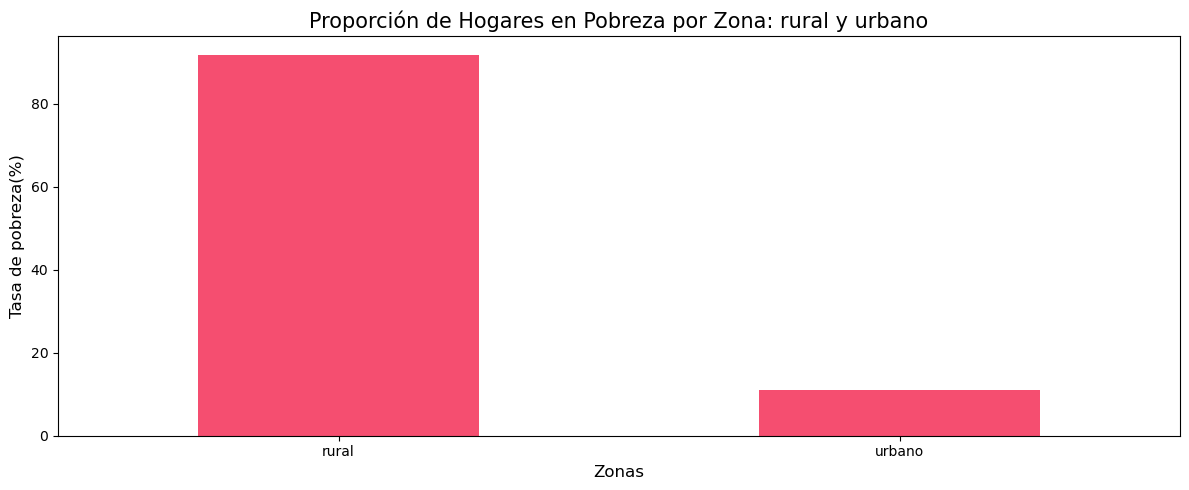

Porcentaje Pobreza según:
👉zonas
rural     91.82
urbano    11.11
dtype: float64


In [163]:
#Gráfico de barras para zonas
plt.figure(figsize=(12,5))
proporcion_pobreza_zonas.plot(kind='bar', color = '#F54E70')
plt.title('Proporción de Hogares en Pobreza por Zona: rural y urbano', fontsize = 15)
plt.xlabel('Zonas', fontsize = 12)
plt.ylabel('Tasa de pobreza(%)', fontsize = 12)

#etiquetas del eje x horizontal
plt.xticks(rotation = 0)
#mostrar gráfico
plt.tight_layout()
plt.show()

print(f"Porcentaje Pobreza según:\n👉{proporcion_pobreza_zonas}")

📌 Conclusiones para pobreza por zona:

1. *Desigualdad marcada:* En las zonas rurales, el 91.8% de los hogares están en pobreza, comparado con solo el 11.1% en zonas urbanas.
2. *Enfoque en áreas rurales:* La pobreza es mucho más alta en zonas rurales, lo que requiere mayor atención y recursos.
3. *Mejores condiciones en áreas urbanas:* Aunque la pobreza existe en las ciudades, es considerablemente menor que en áreas rurales.

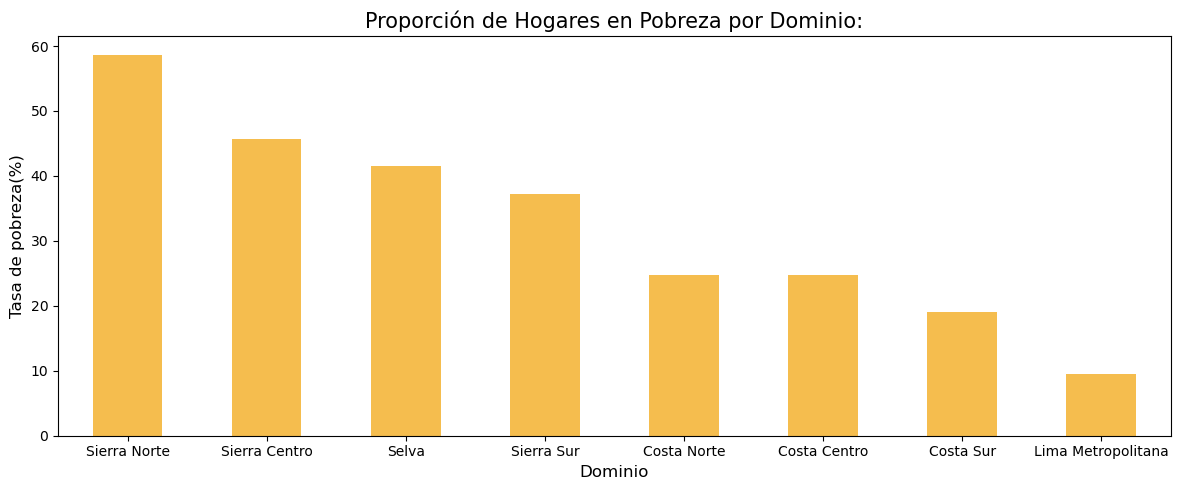

Porcentaje Pobreza según:
👉dominio
Sierra Norte          58.64
Sierra Centro         45.62
Selva                 41.56
Sierra Sur            37.27
Costa Norte           24.79
Costa Centro          24.73
Costa Sur             19.01
Lima Metropolitana     9.43
dtype: float64


In [164]:
#Gráfico de barras para dominio
plt.figure(figsize=(12,5))
proporcion_pobreza_dominio.plot(kind='bar', color = '#F5BD4E')
plt.title('Proporción de Hogares en Pobreza por Dominio:', fontsize = 15)
plt.xlabel('Dominio', fontsize = 12)
plt.ylabel('Tasa de pobreza(%)', fontsize = 12)

#etiquetas del eje x horizontal
plt.xticks(rotation = 0)
#mostrar gráfico
plt.tight_layout()
plt.show()

print(f"Porcentaje Pobreza según:\n👉{proporcion_pobreza_dominio.sort_values(ascending=False)}")

📌 Conclusiones:

* Lima Metropolitana tiene el porcentaje de pobreza más bajo con un 9.43%, mientras que en otras regiones este porcentaje es significativamente mayor.
* En la Sierra Norte, el porcentaje de pobreza llega al 58.64%, es decir, más de 6 veces el porcentaje en Lima.
* Otras regiones con altos índices de pobreza incluyen:

        Sierra Centro con 45.62%, lo que representa casi 5 veces el porcentaje de Lima.
        Selva con 41.56% y Sierra Sur con 37.27%, también muy por encima de Lima.

* Las regiones costeras tienen niveles de pobreza más bajos en comparación con las regiones de la sierra y la selva, aunque aún son superiores a Lima:

        Costa Centro y Costa Norte tienen aproximadamente un 24.7%, más del doble del porcentaje en Lima.
        Costa Sur tiene un 19.01%, que es más del doble del porcentaje en Lima, pero sigue siendo una de las tasas más bajas fuera de la capital.

📌 Finalmente observamos que : las zona 'sierra'(norte y sur) tienen una incidencia de pobreza del 58.64 % y 37.27% respectivamente, mientras que Lima Metropolitana tiene solo el 9.43%

In [165]:
# Filtro para zonas rurales del sur y Lima Metropolitana
zona_norte_rural = df[(df['zonas'] == 'rural') & (df['dominio'].str.contains('Norte'))]
zona_sur_rural = df[(df['zonas'] == 'rural') & (df['dominio'].str.contains('Sur'))]
lima_metropolitana = df[df['dominio'] == 'Lima Metropolitana']

# Cálculo de pobreza en las tres zonas
proporcion_norte_rural = (zona_norte_rural['es_pobre'].sum() / zona_norte_rural.shape[0]) * 100
proporcion_sur_rural = (zona_sur_rural['es_pobre'].sum() / zona_sur_rural.shape[0]) * 100
proporcion_lima = (lima_metropolitana['es_pobre'].sum() / lima_metropolitana.shape[0]) * 100

# Imprimir resultados
print(f'Pobreza en zonas rurales del Norte: {proporcion_norte_rural:.2f}%')
print(f'Pobreza en zonas rurales del sur: {proporcion_sur_rural:.2f}%')
print(f'Pobreza en Lima Metropolitana: {proporcion_lima:.2f}%')

Pobreza en zonas rurales del Norte: 91.58%
Pobreza en zonas rurales del sur: 89.42%
Pobreza en Lima Metropolitana: 9.43%


# 4. Multidimensionalidad de la Pobreza

* Variables clave: 'tipo_empleo', 'tipo_contrato', 'no_recibe_ingresos', 'ocupacion_principal', 'trabajo_ocup_principal'.
* Objetivo: Evaluar la pobreza desde una perspectiva multidimensional, más allá de los ingresos.

* Acción: Utilizar varias variables para capturar diferentes dimensiones de la pobreza (ingreso, empleo formal/informal, tipo de contrato).



* Paso 1: verificar los valores nulos

In [166]:
df.isnull().sum()

mes                           0
ubigeo                        0
dominio                       0
estrato                       0
ocupacion_principal           0
trabajo_ocup_principal        0
sueldo_ingresos               0
honorarios_ingresos           0
no_recibe_ingresos            0
tipo_contrato                 0
ingreso_total                 0
ocupinf                       0
fact_expan_ingresos_empleo    0
zonas                         0
estado_pobreza                0
tipo_empleo                   0
tipo_relacion_laboral         0
es_pobre                      0
dtype: int64

* Paso 2: Crear un índice de Pobreza Multidimensional

    Definimos la condición de pobreza si hay privación en varias dimensiones (empleo, contrato, ingresos, etc.). Puedes utilizar un sistema de puntos o binarios (1 si hay privación, 0 si no).

In [167]:
# crear una columna binaria para cada dimensión de privación
df['privación_empleo'] =  df['tipo_empleo'].apply(lambda x: 1 if x in ['otro'] else 0)
df['privacion_contrato'] = df['tipo_contrato'].apply(lambda x: 1 if x in ['missing value','otro'] else 0)
df['privacion_ingresos'] = df['no_recibe_ingresos'].apply(lambda x: 1 if x == 'no recibe ingresos' else 0)
df['privacion_ocupacion'] = df['ocupacion_principal'].apply(lambda x: 1 if x in ['missing value','no remunerado'] else 0)

#Sumar las privaciones por hogar
df['total_privaciones'] = df[['privación_empleo','privacion_contrato','privacion_ingresos','privacion_ocupacion']].sum(axis=1)

#Definir pobreza multidimensional ( si tiene 2 o más privaciones)
df['pobreza_multidimensional'] = df['total_privaciones'].apply(lambda x:1 if x >= 2 else 0)

#Revisar los resultados
df[['tipo_empleo', 'tipo_contrato', 'no_recibe_ingresos', 'ocupacion_principal', 'total_privaciones', 'pobreza_multidimensional']].head()

,tipo_empleo,tipo_contrato,no_recibe_ingresos,ocupacion_principal,total_privaciones,pobreza_multidimensional
0,otro,indefinido,otro,empleado,1,0
1,otro,otro,otro,obrero,2,1
2,otro,indefinido,otro,empleado,1,0
3,otro,indefinido,otro,empleado,1,0
4,otro,missing value,otro,independiente,2,1


* Paso 3: Analizar los resultados

   📌 Analizar la proporción de hogares que sufren pobreza multidimensional y explorar los insights.

📌El promedio de hogares que sufren de Pobreza Multidimensional en Perú tomando en cuenta
las variables: 'tipo_empleo', 'tipo_contrato', 'no_recibe_ingresos', 'ocupacion_principal' es:
El 84.19% de los hogares sufren pobreza multidimensional

estrato
100,000 a 499,999    79.13
2,000 a 19,999       85.34
20,000 a 49,999      82.76
50,000 a 99,999      78.15
500 a 1,999          89.46
500,000 a más        75.97
AER Compuesto        94.34
AER Simple           94.79
Name: pobreza_multidimensional, dtype: float64


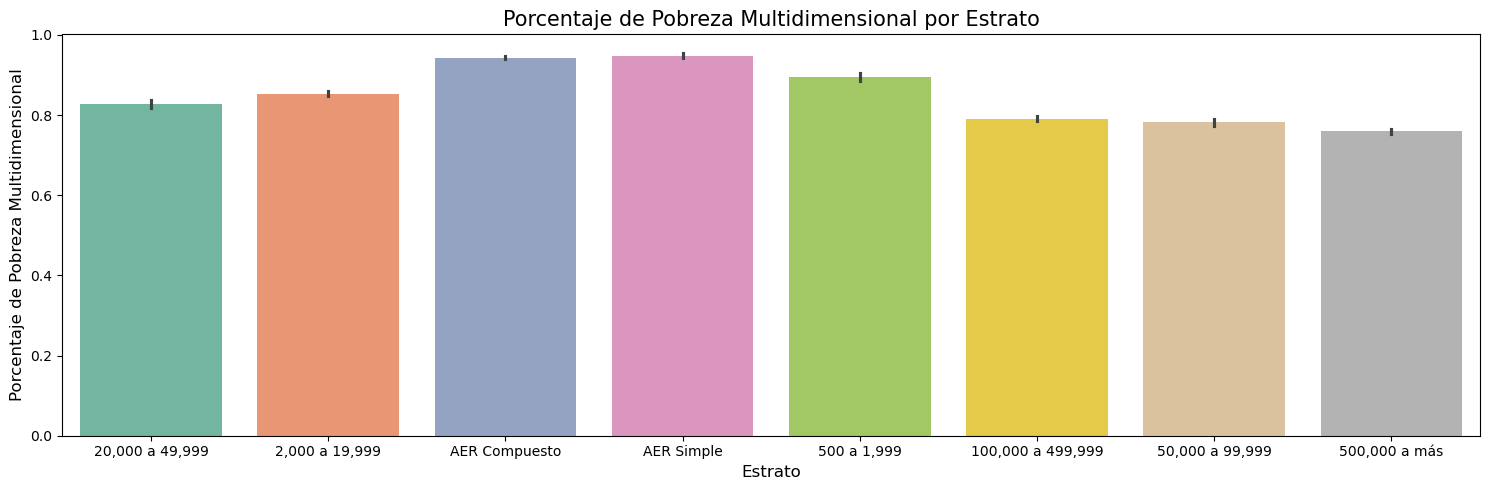

In [168]:
# Proporción de pobreza multidimensional
pobreza_multidimensional_pct = df['pobreza_multidimensional'].mean() *100
print(f"""📌El promedio de hogares que sufren de Pobreza Multidimensional en Perú tomando en cuenta
las variables: 'tipo_empleo', 'tipo_contrato', 'no_recibe_ingresos', 'ocupacion_principal' es:
El {pobreza_multidimensional_pct:.2f}% de los hogares sufren pobreza multidimensional\n""")

#Análisis por estrato 
pobreza_por_estrato = df.groupby('estrato')['pobreza_multidimensional'].mean() *100
pobreza_por_estrato = round(pobreza_por_estrato, 2)
print(pobreza_por_estrato)

#Visualizando Resultados
plt.figure(figsize=(15,5))
sns.barplot(x='estrato', y='pobreza_multidimensional', data=df, palette= 'Set2')

#titulo y etiquetas
plt.title('Porcentaje de Pobreza Multidimensional por Estrato', fontsize = 15)
plt.xlabel('Estrato', fontsize = 12)
plt.ylabel('Porcentaje de Pobreza Multidimensional', fontsize = 12)
plt.tight_layout()
plt.show()

Paso 4: Insight clave

📌  Identificar cuál es el estrato con la mayor proporción de pobreza multidimensional: 

In [169]:
#Encontrar el estrato con mayor proporción de pobreza Multidimensional
estrato_max_pobreza = pobreza_por_estrato.idxmax()
porcentaje_max_pobreza = pobreza_por_estrato.max()
porcentaje_max_pobreza = round(porcentaje_max_pobreza, 2)

print(f"El estrato con mayor pobreza Multidimensional es:\nEstrato: {estrato_max_pobreza}\n📌Porcentaje {porcentaje_max_pobreza}%.")
print('----------------------------')
print(f"AER - Simple: Área de empadronamiento rural - Simple")

El estrato con mayor pobreza Multidimensional es:
Estrato: AER Simple
📌Porcentaje 94.79%.
----------------------------
AER - Simple: Área de empadronamiento rural - Simple


🎯 CONCLUSIONES:

1. *Alto Promedio de Pobreza Multidimensional:* El 84.19% de los hogares en Perú sufren de pobreza multidimensional, indicando múltiples privaciones en áreas críticas como empleo e ingresos.
2. *Variación por Estrato:* 

    📌El estrato 500 a 1,999 tiene la tasa más alta de pobreza multidimensional (89.46%), mientras que el estrato 500,000 a más presenta la más baja (75.97%).

    📌Los estratos AER Compuesto y AER Simple también muestran porcentajes alarmantes de 94.34% y 94.79%, respectivamente.

3. *Necesidad de Estrategias Específicas:* Se requieren intervenciones diferenciadas que aborden las privaciones en múltiples dimensiones, especialmente en los estratos más vulnerables.
4. *Faltan Variables para Medir la Pobreza:* Es importante considerar que pueden faltar más variables en la medición de la pobreza multidimensional, lo que podría contribuir a los altos porcentajes observados. Incluir dimensiones adicionales podría ofrecer una visión más completa y precisa de la pobreza en Perú.

* Insight Clave

    📌El 84.19% de los hogares en Perú sufren de pobreza multidimensional, con el estrato "500 a 1,999" mostrando la tasa más alta de privaciones. Esto resalta la necesidad de políticas públicas integrales que mejoren el acceso a empleo formal y condiciones de vida dignas, así como la importancia de incorporar más variables para una medición más precisa de la pobreza multidimensional.

In [170]:
#Eliminamos variables analizadas para aligerar la memoria
df.drop(columns=['no_recibe_ingresos','tipo_contrato',
                 'total_privaciones',
                 'estrato','privación_empleo',
                 'privacion_contrato','privacion_ingresos','privacion_ocupacion','sueldo_ingresos','honorarios_ingresos','fact_expan_ingresos_empleo'], inplace= True)

In [171]:
#verificar variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79720 entries, 0 to 79719
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       79720 non-null  object 
 1   ubigeo                    79720 non-null  int64  
 2   dominio                   79720 non-null  object 
 3   ocupacion_principal       79720 non-null  object 
 4   trabajo_ocup_principal    79720 non-null  object 
 5   ingreso_total             79720 non-null  float64
 6   ocupinf                   79720 non-null  object 
 7   zonas                     79720 non-null  object 
 8   estado_pobreza            79720 non-null  object 
 9   tipo_empleo               79720 non-null  object 
 10  tipo_relacion_laboral     79720 non-null  object 
 11  es_pobre                  79720 non-null  bool   
 12  pobreza_multidimensional  79720 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 7.4

# 5. Impacto de la Ocupación en la Pobreza

* Variables clave: 'ocupacion_principal', 'trabajo_ocup_principal'.
* Objetivo: Evaluar si ciertas ocupaciones están más relacionadas con niveles de pobreza.

        📌 Acción: Segmentar los hogares por la variable ocupacion_principal y compara los ingresos medios. Calcular qué proporción de personas en cada ocupación se encuentra por debajo de la línea de pobreza.

* Paso 1: usamos nuestra variable creada 'es_pobre', la cual es una columna binaria para identificar los valores que están por debajo de la línea de pobreza

        1: pobre
        0: no pobre

* Paso 2: Análisis con 'ocupación_principal'

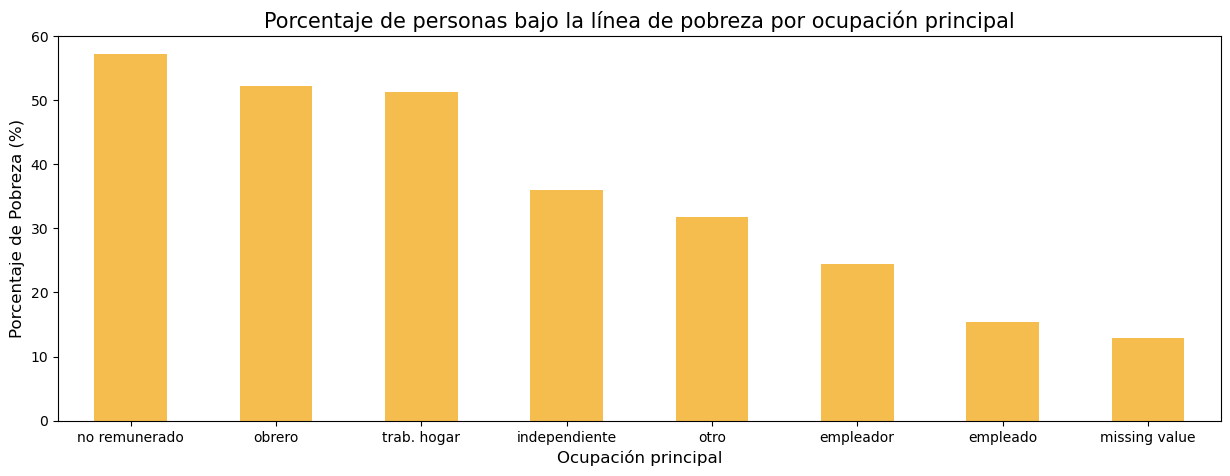

Porcentaje de pobreza 

👉ocupacion_principal
no remunerado    57.17
obrero           52.21
trab. hogar      51.32
independiente    36.02
otro             31.72
empleador        24.50
empleado         15.46
missing value    12.89
Name: es_pobre, dtype: float64


In [172]:
#Usamos una columna que indique si el ingreso está por debajo de la línea de pobreza = df['es_pobre']

#Calcular la proporción de personas bajo pobreza por ocupación principal
pobreza_por_ocupacion = df.groupby('ocupacion_principal')['es_pobre'].mean()*100
pobreza_por_ocupacion = round(pobreza_por_ocupacion, 2)
pobreza_por_ocupacion =  pobreza_por_ocupacion.sort_values(ascending=False) #ordenamos los valores

#Visualización de resultados

plt.figure(figsize=(15,5))
pobreza_por_ocupacion.plot(kind='bar', color='#F5BD4E')     #la paleta de colores es de "https://color.adobe.com/"

#Título y etiquetas
plt.title('Porcentaje de personas bajo la línea de pobreza por ocupación principal', fontsize = 15)
plt.xlabel('Ocupación principal', fontsize = 12)
plt.ylabel('Porcentaje de Pobreza (%)', fontsize = 12)
plt.xticks(rotation = 0)

#Mostrar gráfico
plt.show()


print('Porcentaje de pobreza \n')
print(f"👉{pobreza_por_ocupacion}")



* Resumen: pobreza por ocupación principal

    Los mayores niveles de pobreza se encuentran entre los trabajadores no remunerados (57.17%), obreros (52.21%) y trabajadores del hogar (51.32%), mientras que los empleados (15.46%) y empleadores (24.50%) muestran niveles significativamente menores. Los trabajadores independientes (36.02%) también presentan una alta incidencia de pobreza, pero menor en comparación con ocupaciones más informales o precarias.

📌 Insight Clave

    👉Las ocupaciones informales y con menor estabilidad laboral, como los no remunerados, obreros y trabajadores del hogar, muestran una alta vulnerabilidad a la pobreza, superando el 50%, mientras que los empleados formales tienen una incidencia significativamente menor (15.46%), lo que resalta la importancia de la formalización y estabilidad laboral en la reducción de la pobreza.

* Paso 3: Análisis con 'trabajo_ocup_principal'

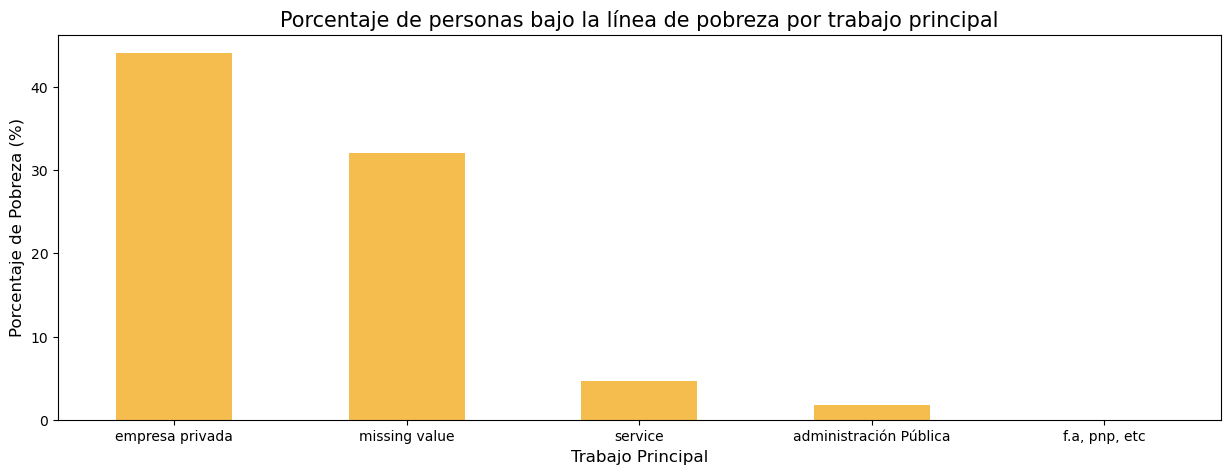

👉trabajo_ocup_principal
empresa privada           44.08
missing value             32.11
service                    4.67
administración Pública     1.77
f.a, pnp, etc              0.00
Name: es_pobre, dtype: float64%


In [173]:
#calcular la proporcion de personas bajo pobreza por 'trabajo_ocup_principal'
pobreza_por_trabajo = df.groupby('trabajo_ocup_principal')['es_pobre'].mean() *100
pobreza_por_trabajo = round(pobreza_por_trabajo,2)
pobreza_por_trabajo =  pobreza_por_trabajo.sort_values(ascending=False) #ordenamos los valores

#Visualización de resultados

plt.figure(figsize=(15,5))
pobreza_por_trabajo.plot(kind='bar', color='#F5BD4E')     #la paleta de colores es de "https://color.adobe.com/"

#Título y etiquetas
plt.title('Porcentaje de personas bajo la línea de pobreza por trabajo principal', fontsize = 15)
plt.xlabel('Trabajo Principal', fontsize = 12)
plt.ylabel('Porcentaje de Pobreza (%)', fontsize = 12)
plt.xticks(rotation = 0)

#Mostrar gráfico
plt.show()


print(f"👉{pobreza_por_trabajo}%")

* Resumen: pobreza por trabajo principal

    El porcentaje de pobreza es más alto entre los trabajadores en la empresa privada (44.08%), seguido por los casos con datos faltantes (32.11%). Los sectores de servicios (4.67%) y administración pública (1.77%) presentan niveles mucho menores, mientras que en las fuerzas armadas y policiales (0.00%) no se observa pobreza.

📌 Insight clave:

    👉La alta incidencia de pobreza en el sector privado (44.08%) resalta que muchos empleos en este sector son precarios o de bajos ingresos, mientras que los sectores públicos y de seguridad, con empleos más formales y estables, presentan una mínima o nula incidencia de pobreza, subrayando la relevancia de la estabilidad laboral y beneficios sociales en la reducción de la pobreza.

# 6. Desigualdad de Ingresos

* Variables clave: ingreso_total
* Objetivo: Medir la desigualdad en la distribución de ingresos.

📌 Acción: Calcular el Índice de Gini y crear la curva de Lorenz para medir la desigualdad de ingresos en el dataset.

* Paso 1: guardar los valores de la variable 'ingreso_total'

In [174]:
#guardamos los valores de 'ingreso_total' en la variable 'ingreso_total'
ingreso_total =  df['ingreso_total']
ingreso_total


0        5000.0
1         800.0
2        1660.0
3        2300.0
4        1000.0
          ...  
79715      30.0
79716     300.0
79717     300.0
79718     300.0
79719     300.0
Name: ingreso_total, Length: 79720, dtype: float64

* Paso 2: Definir una función para calcular el Índice de Gini

        El Índice de Gini mide la desigualdad en la distribución de los ingresos. Un valor de 0 indica perfecta igualdad, mientras que un valor de 1 indica máxima desigualdad. Para calcularlo usamos la funcion importada "Gini"

In [175]:

def calcular_gini(ingresos):
    # Ordenar los ingresos en orden creciente
    ingresos_sorted = np.sort(ingresos)

    # Calcular la proporción acumulada de ingresos y de población
    ingresos_acum = np.cumsum(ingresos_sorted)
    total_ingresos = ingresos_acum[-1]
    ingresos_acum /= total_ingresos

    n = len(ingresos)  # número de observaciones
    proporciones_poblacion = np.arange(1, n+1) / n  # proporción acumulada de la población

    # Calcular el Índice de Gini usando la fórmula
    B = np.trapz(ingresos_acum, proporciones_poblacion)  # Área bajo la curva de Lorenz
    Gini = 1 - 2 * B

    return Gini

# Calcular el Índice de Gini
gini = calcular_gini(ingreso_total)
print(f'Índice de Gini: {gini:.2f}')

Índice de Gini: 0.37


* ¿Qué significa el valor?

        0: Representa igualdad perfecta, es decir, todos tienen los mismos ingresos.
        1: Representa desigualdad máxima, donde una sola persona tiene todos los ingresos y los demás no tienen nada.

El valor de 0.37 significa que la desigualdad en la distribución de ingresos no es extrema, pero tampoco es insignificante. Comparado con estándares internacionales:

                Un Gini cercano a 0.3 se considera baja desigualdad.
                Un Gini de 0.4 o más se considera alta desigualdad.

El índice de gini de ésta muestra es 0.37, comparado con el gini promedio de Perú 0.41, quiere decir que el resultado obtenido refleja menor desigualdad que el promedio nacional

* Paso 3: definir una función para calcular la curva de lorenz

    La curva de Lorenz es una representación gráfica de la distribución de los ingresos o la riqueza. Muestra la proporción acumulada de ingresos en relación con la proporción acumulada de la población, ordenada de menor a mayor ingreso.

In [176]:
def curva_lorenz(ingresos):
    # Ordenar los ingresos
    ingresos_sorted = np.sort(ingresos)

    # Calcular la proporción acumulada de ingresos
    ingresos_acum = np.cumsum(ingresos_sorted)
    total_ingresos = ingresos_acum[-1]
    ingresos_acum /= total_ingresos  # Normalizamos a 1 (proporción)

    # Proporción acumulada de la población
    n = len(ingresos)
    proporciones_poblacion = np.arange(1, n+1) / n
    
    #Añadir el punto (0,0) para la curva de lorenz
    ingresos_acum =  np.insert(ingresos_acum, 0, 0)
    proporciones_poblacion =  np.insert(proporciones_poblacion, 0, 0)
    
    return proporciones_poblacion, ingresos_acum


* Paso 4: graficar la curva de lorenz

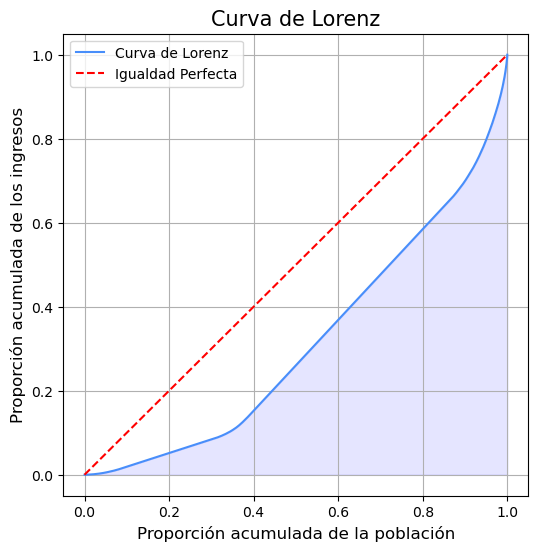

In [177]:
def graficar_curva_lorenz(ingresos):
    proporciones_poblacion, ingresos_acum = curva_lorenz(ingresos)

    # Crear la gráfica
    plt.figure(figsize=(6,6))
    plt.plot(proporciones_poblacion, ingresos_acum, label="Curva de Lorenz", color="#488EFA")
    plt.plot([0,1], [0,1], label="Igualdad Perfecta", linestyle='--', color='red')  # Línea de igualdad perfecta
    plt.fill_between(proporciones_poblacion, ingresos_acum, color="blue", alpha=0.1)  # Relleno bajo la curva

    # Añadir etiquetas y título
    plt.title('Curva de Lorenz', fontsize = 15)
    plt.xlabel('Proporción acumulada de la población', fontsize = 12)
    plt.ylabel('Proporción acumulada de los ingresos', fontsize = 12)
    plt.legend()
    plt.grid(True)
    plt.show()


# Graficar la Curva de Lorenz
graficar_curva_lorenz(ingreso_total)

* Paso 5: calcular el índice de Gini por zonas (urbano y rural) usando la función ya creada 'calcular_gini()'

In [178]:
df['zonas'].value_counts()

zonas
urbano    58320
rural     21400
Name: count, dtype: int64

In [179]:
#filtramos los datos por zona: rural y urbano
ingresos_urbanos = df[df['zonas'] == 'urbano']['ingreso_total'].to_numpy() #ingresos en zona urbana
ingresos_rurales = df[df['zonas'] == 'rural']['ingreso_total'].to_numpy() #ingresos en zona rural


#calcular el índice de gini para cada zona usando la funcion 'calcular_gini'
gini_urbano = calcular_gini(ingresos_urbanos)
gini_rural = calcular_gini(ingresos_rurales)

#mostrar resultados
print(f"Índice de gini - Zona Urbana: {gini_urbano:.2f}")
print(f"Índice de gini - Zona Rural: {gini_rural:.2f}")

Índice de gini - Zona Urbana: 0.28
Índice de gini - Zona Rural: 0.23


📌 CONCLUSIONES:

👉El Índice de Gini promedio de 0.37 refleja una desigualdad moderada en la distribución de ingresos en Perú, lo que indica que la pobreza no solo está ligada a bajos ingresos, sino también a cómo estos se distribuyen. Las zonas rurales y los estratos socioeconómicos más bajos enfrentan mayores desigualdades, perpetuando ciclos de pobreza.

👉Índice de Gini en zona urbana (0.28): Indica moderada desigualdad, reflejando mayor variabilidad en ingresos debido a una economía más diversa.

👉Índice de Gini en zona rural (0.23): La desigualdad es ligeramente menor, pero los ingresos son más bajos y homogéneos.

* Insight Clave

    ✅ En zonas rurales, la pobreza está relacionada con bajos ingresos generales más que con la desigualdad, mientras que en zonas urbanas, la desigualdad en el acceso a oportunidades es un factor importante que agrava la pobreza.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79720 entries, 0 to 79719
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       79720 non-null  object 
 1   ubigeo                    79720 non-null  int64  
 2   dominio                   79720 non-null  object 
 3   ocupacion_principal       79720 non-null  object 
 4   trabajo_ocup_principal    79720 non-null  object 
 5   ingreso_total             79720 non-null  float64
 6   ocupinf                   79720 non-null  object 
 7   zonas                     79720 non-null  object 
 8   estado_pobreza            79720 non-null  object 
 9   tipo_empleo               79720 non-null  object 
 10  tipo_relacion_laboral     79720 non-null  object 
 11  es_pobre                  79720 non-null  bool   
 12  pobreza_multidimensional  79720 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 7.4

In [181]:
#guardamos la data para pasar a la conversión de ubigeo
# y posteriormente a la visualización del Dashboard en Tableau
ruta = ('C:\\Users\\LENOVO\\Desktop\\Projects\\Poverty-Peru\\ubigeo-conversion-data2022-500.csv')

df.to_csv(ruta,index=False)

# Visualización de la información en Tableau

* Paso 1: Transformar la variable ubigeo a ubicaciones geográficas (departamento, provincia y distrito) 

    👉Puedes descargar el archivo de referencia UBIGEO: 'geodir-ubigeo-inei.xlsx' en la página de INEI : 

    https://account.geodir.co/recursos/ubigeo-inei-peru.html


    📌 o descarga el archivo ubigeo directo aquí: 👇👇
    
    ✅ https://github.com/WLozanoH/Poverty-Peru/blob/main/geodir-ubigeo-inei.csv

In [182]:
#importar las librerías necesarias 
import pandas as pd

## Cargar el archivo de referencia UBIGEO (geodir-ubigeo-inei.csv)
ubigeo_ref = pd.read_csv('geodir-ubigeo-inei.csv', sep = ';') # Este archivo debe contener columnas: ['ubigeo', 'departamento', 'provincia', 'distrito']

ubigeos = pd.read_csv('ubigeo-conversion-data2022-500.csv', usecols=['mes','ubigeo','dominio','ocupacion_principal','ingreso_total','zonas','estado_pobreza','tipo_relacion_laboral','es_pobre','pobreza_multidimensional'], sep=',')

* Paso 2: Unir ambos dataset

    Utiliza la variable 'ubigeo' para hacer una "join" entre los dos datasets, de modo que puedas obtener las ubicaciones correspondientes a cada UBIGEO.


In [183]:
ubigeos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79720 entries, 0 to 79719
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       79720 non-null  object 
 1   ubigeo                    79720 non-null  int64  
 2   dominio                   79720 non-null  object 
 3   ocupacion_principal       79720 non-null  object 
 4   ingreso_total             79720 non-null  float64
 5   zonas                     79720 non-null  object 
 6   estado_pobreza            79720 non-null  object 
 7   tipo_relacion_laboral     79720 non-null  object 
 8   es_pobre                  79720 non-null  bool   
 9   pobreza_multidimensional  79720 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 5.6+ MB


📌 Asegúrate que la variable 'ubigeo' esté escrita igual en ambos dataset para unir con éxito los datos.

In [184]:
# Hacer un merge para añadir la información geográfica a los UBIGEOs
resultado = pd.merge(ubigeos, ubigeo_ref, on = 'ubigeo', how ='left')
resultado.head()

,mes,ubigeo,dominio,ocupacion_principal,ingreso_total,zonas,estado_pobreza,tipo_relacion_laboral,es_pobre,pobreza_multidimensional,Distrito,Provincia,Departamento,Poblacion,Superficie,Y,X
0,Febrero,10101,Sierra Norte,empleado,5000.0,urbano,No pobre,informal,False,0,Chachapoyas,Chachapoyas,Amazonas,"29,171",153.78,-6.2294,-77.8714
1,Febrero,10101,Sierra Norte,obrero,800.0,urbano,No pobre,formal,False,1,Chachapoyas,Chachapoyas,Amazonas,"29,171",153.78,-6.2294,-77.8714
2,Febrero,10101,Sierra Norte,empleado,1660.0,urbano,No pobre,informal,False,0,Chachapoyas,Chachapoyas,Amazonas,"29,171",153.78,-6.2294,-77.8714
3,Febrero,10101,Sierra Norte,empleado,2300.0,urbano,No pobre,informal,False,0,Chachapoyas,Chachapoyas,Amazonas,"29,171",153.78,-6.2294,-77.8714
4,Febrero,10101,Sierra Norte,independiente,1000.0,urbano,No pobre,informal,False,1,Chachapoyas,Chachapoyas,Amazonas,"29,171",153.78,-6.2294,-77.8714


* Paso 3: Guardar los resultados

    Una vez que tengas las ubicaciones mapeadas, puedes guardar los resultados en un nuevo archivo CSV.

In [185]:
# Guardar el resultado en un archivo CSV
resultado.to_csv('visualización-data-pobreza.csv', index=False)

📌 Puedes ver el resultado del dashboard de Pobreza en Perú 2022 en el siguiente enlace: 👇👇

✅ https://public.tableau.com/app/profile/wilmer.lozano/viz/Visualization-tableau-Poverty-Peru-2022-Analysis_ipynb/Dashboard1?publish=yes